# 2장 스크래퍼로 데이터 수집

In [4]:
!pip install bs4


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#\30 05000000 > span.tit
import requests

url = "https://www.gilbut.co.kr/search/search_book_list"
response = requests.get(url)
html = response.text

html

'\r\n<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t<meta charset="UTF-8">\n\t<!-- <meta content="width=device-width,user-scalable=no,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="Viewport"> -->\n\t<meta content="width=1400" name="Viewport">\n\t<title>길벗, 이지톡</title>\n\t<link rel="alternate" media="only screen and (max-width: 640px)" href="https://www.gilbut.co.kr/m/search/search_book_list">\n\t<meta http-equiv="Pragma" content="no-cache">\n\t<meta http-equiv="Cache-Control" content="no-cache">\n\t<!--  -->\n\t<link rel="shortcut icon" href="/favicon.ico">\n\t<meta name="description" content="IT, 어학, 자기계발, 재테크, 인문, 여행 등 학습과 실용 분야 출판">\n\t<meta name="keywords" content="">\n\t<meta name="author" content="길벗, 이지톡">\n\n\t<meta property="og:type" content="website">\n\t<meta property="og:title" content="길벗, 이지톡">\n\t<meta property="og:description" content=" IT, 어학, 자기계발, 재테크, 인문, 여행 등 학습과 실용 분야 출판">\n\t<meta property="og:image" content="http://www.gilbut.co.kr/images/common/gilb

In [5]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
categorys = soup.select("span.tit")

print("categorys 출력", categorys)

categorys 출력 [<span class="tit">전체 도서</span>, <span class="tit">컴퓨터/IT활용</span>, <span class="tit">IT전문서/IT입문서</span>, <span class="tit">IT자격증 수험서</span>, <span class="tit">IT대학교재</span>, <span class="tit">취업/수험서</span>, <span class="tit">경제/경영</span>, <span class="tit">자기계발</span>, <span class="tit">인문/교양</span>, <span class="tit">여행</span>, <span class="tit">취미/건강/가정</span>, <span class="tit">자녀교육</span>, <span class="tit">영어</span>, <span class="tit">토익, 오픽 등</span>, <span class="tit">일본어</span>, <span class="tit">중국어</span>, <span class="tit">기타 외국어</span>, <span class="tit">빠른조회</span>, <span class="tit">공유하기</span>, <span class="tit">FAQ</span>, <span class="tit">1:1문의</span>, <span class="tit">최근 본 도서</span>, <span class="tit">모바일로 열기</span>]


In [6]:
cate = categorys[0]
print("태그 정보 제거 전 :", cate)
print("태그 정보 제거 후 :", cate.text)

태그 정보 제거 전 : <span class="tit">전체 도서</span>
태그 정보 제거 후 : 전체 도서


In [7]:
category_text = [cate.text for cate in categorys]
category_text

['전체 도서',
 '컴퓨터/IT활용',
 'IT전문서/IT입문서',
 'IT자격증 수험서',
 'IT대학교재',
 '취업/수험서',
 '경제/경영',
 '자기계발',
 '인문/교양',
 '여행',
 '취미/건강/가정',
 '자녀교육',
 '영어',
 '토익, 오픽 등',
 '일본어',
 '중국어',
 '기타 외국어',
 '빠른조회',
 '공유하기',
 'FAQ',
 '1:1문의',
 '최근 본 도서',
 '모바일로 열기']

In [8]:
category_text = []
for cate in categorys:
    tmp = cate.text
    category_text.append(tmp)

In [10]:
fin_category = []
for book in category_text:
    if ('도서' not in book) and ('모바일' not in book) and ('문의' not in book) and \
        ('FAQ' not in book) and ('조회' not in book) and  ('공유' not in book):
        fin_category.append(book)

fin_category

['컴퓨터/IT활용',
 'IT전문서/IT입문서',
 'IT자격증 수험서',
 'IT대학교재',
 '취업/수험서',
 '경제/경영',
 '자기계발',
 '인문/교양',
 '여행',
 '취미/건강/가정',
 '자녀교육',
 '영어',
 '토익, 오픽 등',
 '일본어',
 '중국어',
 '기타 외국어']

## requests 라이브러리를 활용한 커뮤니티 정보 수집

In [17]:
import requests
from bs4 import BeautifulSoup

import time
import pandas as pd


In [4]:
url = 'https://search.dcinside.com/post/p/{}/q/.ED.8E.B8.EC.9D.98.EC.A0.90'

for page in range(1, 10):
    print(url.format(page))

https://search.dcinside.com/post/p/1/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/2/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/3/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/4/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/5/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/6/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/7/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/8/q/.ED.8E.B8.EC.9D.98.EC.A0.90
https://search.dcinside.com/post/p/9/q/.ED.8E.B8.EC.9D.98.EC.A0.90


### HTML 수집과 파싱

In [5]:
response = requests.get(url.format(1))
html = response.text
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="darkmode" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="kr" name="content-language"/>
<meta content="8_SyZg2Wg3LNnCmFXzETp7ld4yjZB8ny17m8QsYsLwk" name="google-site-verification"/>
<meta content="디시인사이드" name="author"/>
<meta content="디시인사이드 검색결과" name="title"/>
<meta content="디시인사이드 검색결과" name="description"/>
<meta content="website" property="og:type"/>
<meta content="디시인사이드 검색결과" property="og:title"/>
<meta content="디시인사이드 검색결과" property="og:description"/>
<meta content="https://nstatic.dcinside.com/dc/w/images/descrip_img.png" property="og:image"/>
<meta content="https://www.dcinside.com/" property="og:url"/>
<title>디시인사이드 검색결과</title>
<!--[if IE 7]>
	<link rel="stylesheet" type="text/css" href="https://nstatic.dcinside.com/dc/w/css/ie7.css"/>
	<![endif]-->
<script src="https://nstatic.dcinside.com/dgn/gallery/js/cross_domain.js" type="text/javascript"></script>
<!--[if lt IE 9]>
	<script 

### 정보 수집하기

In [6]:
title_soup = soup.select('a.tit_txt')
titles = [title.text for title in title_soup]

titles[:4]

['술주정으로 벗고 다녀도 이미지 좋아진 케이스',
 '뉴비 카드 추천 부탁드립니다',
 '지금은 존나좋은시대지 ㅇㅇ',
 '어제 학교 편의점에서 시지지 나오더라']

In [7]:
def find_titles(soup):
    """게시물 제목을 수집"""
    title_soup = soup.select('a.tit_txt')
    titles = [title.text for title in title_soup]

    return titles
titles = find_titles(soup)
titles[:-4]

['술주정으로 벗고 다녀도 이미지 좋아진 케이스',
 '뉴비 카드 추천 부탁드립니다',
 '지금은 존나좋은시대지 ㅇㅇ',
 '어제 학교 편의점에서 시지지 나오더라',
 '인디게임갤 국비지원 개발조무사 새끼들마냥 좆박은 패치만 내놓노',
 '집앞 편의점 털었다',
 '궐련형 쓰다가 입호흡기 넘어가려는데',
 '워뇨 짐빔 어디서팜,???',
 'ㅈㄴ 급함 객관적으로 봐줘',
 '비오는데 부거먹으러 나가긴 귀찮고',
 '편의점 삼김먹으면 왤캐 소화가 안되지',
 '이제 내 나이 곧 40살이나 마찬가지임.',
 '잭콬 꿀맛임',
 '크보빵 생각보다 구하기 어렵진 않드만',
 'GTX 중증외상센터 관련 기사와 이 영상 보내는 중',
 '편의점 알바 주휴 안주는데 많음?',
 '편의점 점장 갈수록 짜증나네',
 '편의점 점장 레전드.jpg',
 '누가 어제 편의점 야간 알바 주삼이 누나 건드렸냐?',
 '편의점에삼선슬리퍼파냐?',
 '편의점전용상품은 편의점전용인이유가잇단거임.']

In [8]:
content_soup = soup.select('p.link_dsc_txt')
contents = [content.text for content in content_soup]

contents[-10:]

['3~4개정도진열해놓고못팔면폐기한다는거임. 편의점이라서가능하단거임 ...',
 '판타지2025.05.16 09:37',
 '입구에서 나가면 자동차만 쌩쌩 지나다녀서 이곳에서 도피해봤자 아무의미도 없다는 느낌이 들게함 편의점하나 이용하는데에도 입구까지 걸어가야되고 편의점 옆에는 식당인데 고개 돌리자마자 훈련소 특유의 물...',
 '만화2025.05.16 09:33',
 '외노자만 일하는 이유가 뭐임? 스시녀들은 코로나 이후로 편순이 알바하는거 싫어진거냐?',
 '여행-일본2025.05.16 09:26',
 '스벅같은거',
 '붕괴 스타레일2025.05.16 09:25',
 '다 챙기고 담배안챙긴 나 시바 근처에 편의점도 없어 아',
 '이세계아이돌2025.05.16 09:24']

In [9]:
print("본문 내용 :", contents[0], contents[2])
print("갤러리 및 날짜 정보 :", contents[1], contents[3])

본문 내용 : 줄리엔강 술버릇이 편의점 에서 정리정돈 하는 거 - dc official App 알고는 있지만 귀찮 3. 주요 사용처: 아파트관리비(전기포함), 가스비, 통신비, 홈플익스프레스, 편의점, 배민, 다이소, 카페, 주유, 쿠팡, 알리, 테무 학원, 보험 4. 고정지출: 관리비 20, 가스 5~20 통신비 Skt...
갤러리 및 날짜 정보 : 더불어민주당2025.05.16 10:32 신용카드2025.05.16 10:28


In [11]:
def find_content(soup):
    """게시판 본문과 게시판 및 작성일을 수집한다"""
    content_soup = soup.select('p.link_dsc_txt')
    contents = [content.text for content in content_soup]

    contents_text = []
    etc = []
    for idx, content in enumerate(contents):
        if idx % 2 == 0:
            contents_text.append(content)

        else:
            etc.append(content)

    return contents_text, etc

contents_text, etc = find_content(soup)
print(contents_text[-2:])
print(etc[-2:])

['스벅같은거', '다 챙기고 담배안챙긴 나 시바 근처에 편의점도 없어 아']
['붕괴 스타레일2025.05.16 09:25', '이세계아이돌2025.05.16 09:24']


In [12]:
titles = []
contents = []
etcs = []

for i in range(1, 101):
    print("100 페이지 중 현재 {} 페이지".format(i))
    response = requests.get(url.format(i))
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    title = find_titles(soup)
    content, etc = find_content(soup)

    titles.extend(title)
    contents.extend(content)
    etcs.extend(etc)

    time.sleep(1)

100 페이지 중 현재 1 페이지
100 페이지 중 현재 2 페이지
100 페이지 중 현재 3 페이지
100 페이지 중 현재 4 페이지
100 페이지 중 현재 5 페이지
100 페이지 중 현재 6 페이지
100 페이지 중 현재 7 페이지
100 페이지 중 현재 8 페이지
100 페이지 중 현재 9 페이지
100 페이지 중 현재 10 페이지
100 페이지 중 현재 11 페이지
100 페이지 중 현재 12 페이지
100 페이지 중 현재 13 페이지
100 페이지 중 현재 14 페이지
100 페이지 중 현재 15 페이지
100 페이지 중 현재 16 페이지
100 페이지 중 현재 17 페이지
100 페이지 중 현재 18 페이지
100 페이지 중 현재 19 페이지
100 페이지 중 현재 20 페이지
100 페이지 중 현재 21 페이지
100 페이지 중 현재 22 페이지
100 페이지 중 현재 23 페이지
100 페이지 중 현재 24 페이지
100 페이지 중 현재 25 페이지
100 페이지 중 현재 26 페이지
100 페이지 중 현재 27 페이지
100 페이지 중 현재 28 페이지
100 페이지 중 현재 29 페이지
100 페이지 중 현재 30 페이지
100 페이지 중 현재 31 페이지
100 페이지 중 현재 32 페이지
100 페이지 중 현재 33 페이지
100 페이지 중 현재 34 페이지
100 페이지 중 현재 35 페이지
100 페이지 중 현재 36 페이지
100 페이지 중 현재 37 페이지
100 페이지 중 현재 38 페이지
100 페이지 중 현재 39 페이지
100 페이지 중 현재 40 페이지
100 페이지 중 현재 41 페이지
100 페이지 중 현재 42 페이지
100 페이지 중 현재 43 페이지
100 페이지 중 현재 44 페이지
100 페이지 중 현재 45 페이지
100 페이지 중 현재 46 페이지
100 페이지 중 현재 47 페이지
100 페이지 중 현재 48 페이지
100 페이지 중 현재 49 페이지
100 페이지 중 현재 50 페이지
100 페이지 중

### 데이터 전처리 : 정규 표현식

In [13]:
import re

phone_number = "제 연락처는 010-1234-5678 이에요"
pattern_number = r"\d{3}-\d{4}-\d{4}"
number = re.search(pattern_number, phone_number)
print("번호 추출 결과 :", number.group())

번호 추출 결과 : 010-1234-5678


In [14]:
kor_eng_text = "'안녕하세요'는 영어로 Hello 인가요?"
kor_pattern = '[가-힣]+'
kor = re.compile(kor_pattern).findall(kor_eng_text)
print("추출 1단계 :", kor)
print("추출 2단계 :", " ".join(kor))

추출 1단계 : ['안녕하세요', '는', '영어로', '인가요']
추출 2단계 : 안녕하세요 는 영어로 인가요


In [15]:
df = pd.DataFrame({"게시물제목": titles, "내용": contents, "기타 정보": etcs})
df

,게시물제목,내용,기타 정보
0,술주정으로 벗고 다녀도 이미지 좋아진 케이스,줄리엔강 술버릇이 편의점 에서 정리정돈 하는 거 - dc official App,더불어민주당2025.05.16 10:32
1,뉴비 카드 추천 부탁드립니다,"알고는 있지만 귀찮 3. 주요 사용처: 아파트관리비(전기포함), 가스비, 통신비, ...",신용카드2025.05.16 10:28
2,지금은 존나좋은시대지 ㅇㅇ,냉장고도 없고 난방도 벽난로고 스마트폰은커녕 컴퓨터도없어서 할거없고 항생제도 없어서...,메이플스토리2025.05.16 10:25
3,어제 학교 편의점에서 시지지 나오더라,,이세계아이돌2025.05.16 10:17
4,인디게임갤 국비지원 개발조무사 새끼들마냥 좆박은 패치만 내놓노,생색만 주구장창내는 꼬라지 편의성 개편은 잘한거 아니냐고? 저 새끼들이 게임 개발자...,마비노기2025.05.16 10:17
...,...,...,...
2495,근데 요즘 애들 저븐이라는 말 모르나?,편의점에 나무 저븐 안보이길래 알바한테 나무 저븐 달라카니깐 못알아먹던데,뤼튼2025.05.12 16:03
2496,후반기 내한 준비중,RED CROSS LIVE HALL 가면 편의점 교환권 되팔렘으로 쌀먹 가능함 님들...,일본 가수2025.05.12 16:02
2497,띠니가 잦이었으면 근처 인력소 갔을텐데,잦 달고 카페 편의점 이런 좆바는 왜하노,여자 연예인2025.05.12 16:00
2498,맞다 편의점 안망하는 이유중 하나가 그거였는데 담배 광고,담배 광고 그거 예전에 월세 만큼 나오던가 못나오는 집도 있었음 번화가는 담배 광고...,편의점2025.05.12 15:50


In [16]:
import re

etc_info = "편의점2022.06.02 19:33" 

pattern = r"\d{4}.\d+.\d+" 
result = re.search(pattern, etc_info)
date = result.group()

print("입력 정보 : ", etc_info)
print("정규 표현식 처리 후 결과:",date)

입력 정보 :  편의점2022.06.02 19:33
정규 표현식 처리 후 결과: 2022.06.02


In [18]:
def find_date(text):
    """날짜를 찾는다"""
    pattern = r"\d+.\d+.\d+"
    result = re.search(pattern, text)
    date = result.group()

    return date

def find_time(text):
    """시간 찾기"""
    pattern = r"\d+:\d+"
    result = re.search(pattern, text)
    time_f = result.group()

    return time_f

text = "만화2022.05.31 17:34"
time_result = find_time(text = text)
date_result = find_date(text = text)

print("입력 정보 : ", text)
print("날짜 정보 : ", date_result)
print("시간 정보 : ", time_result)

입력 정보 :  만화2022.05.31 17:34
날짜 정보 :  2022.05.31
시간 정보 :  17:34


In [19]:
df['날짜'] = df['기타 정보'].apply(lambda x:find_date(x))
df['작성시간'] = df['기타 정보'].apply(lambda x:find_time(x))
df.sample(3)

,게시물제목,내용,기타 정보,날짜,작성시간
2405,편의점에서 유통기한6시간지난 빠유받았어,어제버거뿌렸더니 복받았다 부패하기전에마셔야지,프로젝트 세카이2025.05.12 18:51,2025.05.12,18:51
306,흠 띠동갑 어떻게 생각함,대학로 편의점에서 근무중인데 신입생으로 보이는데 날 보는 눈이 심상치 않다 신입생이...,편의점2025.05.15 23:02,2025.05.15,23:02
1661,신상디저트 후기,잡아줘서 조합도 좋아요 더 맛있게 먹는 방법은 요거트 찍어서 먹기 딸기시럽 뿌려서 ...,이채영(프로미스나인)2025.05.13 22:47,2025.05.13,22:47


In [20]:
from dateutil.parser import parse

date = "2022.06.04" 

dateinfo = parse(date)

print("date 변수의 데이터 타입 : ", type(date))
print("dateinfo 변수의 데이터 타입 : ", type(dateinfo))
print("연도 정보 : ", dateinfo.year)
print("월 정보 : ", dateinfo.month)
print("일 정보 : ", dateinfo.day)

date 변수의 데이터 타입 :  <class 'str'>
dateinfo 변수의 데이터 타입 :  <class 'datetime.datetime'>
연도 정보 :  2022
월 정보 :  6
일 정보 :  4


In [21]:
import calendar

calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)

5

In [22]:
def find_day(date):
    """요일 정보를 반환"""

    try:
        dateinfo = parse(date)

        days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

        day = days[calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)]
        
        return day
    except:
        return "알수없음" 
    
day = find_day(date = "2022.06.04")
print("오늘은 {}입니다.".format(day))

오늘은 토요일입니다.


In [23]:
df['날짜'].value_counts()

날짜
2025.05.15        705
2025.05.14        631
2025.05.13        622
2025.05.16        256
2025.05.12        252
9992025.05.15       5
9992025.05.12       4
5002025.05.14       3
1,2,3               2
482025.05.15        2
9992025.05.16       2
422025.05.14        1
22025.05.15         1
482025.05.16        1
5002025.05.16       1
22025.05.14         1
52025.05.13         1
52025.05.14         1
9992025.05.14       1
482025.05.13        1
19992025.05.13      1
5002025.05.13       1
9992025.05.13       1
22025.05.13         1
2502025.05.13       1
82025.05.12         1
22025.05.12         1
Name: count, dtype: int64

In [24]:
df['요일'] = df['날짜'].apply(lambda x:find_day(x))

df['시간(H)'] = df['작성시간'].apply(lambda x:x.split(":")[0])

df.sample(3)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간(H)
27,요아정 왜먹는지 이해안돼,나같은 상남자는 걍 편의점에서 1300원짜리 썅썅바하나 사서 혼자 두쪽다 쳐먹으면 ...,뤼튼2025.05.16 09:18,2025.05.16,09:18,금요일,09
409,편의점치킨먹고싶다,양념소스도같이사서 먹고싶다 근데 차끌줄모르고 차로가야 편의점나오는시골이라서 못먹음 ...,다이어트2025.05.15 20:24,2025.05.15,20:24,목요일,20
1159,딥앤로우 세일,25년 3월 / 당화(13.3) 공복(420) 식1.5(600) 25년 4월 / 당...,인슐린2025.05.14 18:56,2025.05.14,18:56,수요일,18


### 결과 저장

In [ ]:
import os
SAVE_FILE_PATH = './data/'

if not os.path.exists(SAVE_FILE_PATH):
    os.makedirs(SAVE_FILE_PATH)

df.to_excel(SAVE_FILE_PATH+'디시인사이드_편의점게시물.xlsx', index=False)

In [27]:
SAVE_FILE_PATH = './data/'

In [32]:
df = pd.read_excel(SAVE_FILE_PATH + '디시인사이드_편의점게시물.xlsx')
df.head(3)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간(H)
0,술주정으로 벗고 다녀도 이미지 좋아진 케이스,줄리엔강 술버릇이 편의점 에서 정리정돈 하는 거 - dc official App,더불어민주당2025.05.16 10:32,2025.05.16,10:32,금요일,10
1,뉴비 카드 추천 부탁드립니다,"알고는 있지만 귀찮 3. 주요 사용처: 아파트관리비(전기포함), 가스비, 통신비, ...",신용카드2025.05.16 10:28,2025.05.16,10:28,금요일,10
2,지금은 존나좋은시대지 ㅇㅇ,냉장고도 없고 난방도 벽난로고 스마트폰은커녕 컴퓨터도없어서 할거없고 항생제도 없어서...,메이플스토리2025.05.16 10:25,2025.05.16,10:25,금요일,10


# 무엇이든 수집하는 selenium 라이브러리

## 가상 웹 브라우저 사용 준비
1. 가상 웹 브라우저를 실행
2. 가상 웹 브라우저를 명령어로 조작하여 원하는 웹 사이트에 접속
3. 가상 웹 브라우저가 접속한 웹 페이지에서 해당 웹 사이트 정보를 수집


In [33]:
!pip install selenium

  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.4 MB 8.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.4 MB 10.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.1/9.4 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 12.4 MB/s eta 0:00:00
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached wsproto-1.2.0-py3-none-any.whl (24 k


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup
import time

import warnings
warnings.filterwarnings("ignore")

driver = webdriver.Chrome()

page_url = "https://cafe.naver.com/f-e/cafes/10298136/menus/116?page=2"

driver.get(page_url)

<html class="skin_green green" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js" type="text/javascript"></script><script defer="" src="https://ssl.pstatic.net/static.gn/templates/gnb_utf8.nhn" type="text/javascript"></script><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link data-precedence="next" href="https://ca-fe.pstatic.net/pc/_next/static/css/92fb06cbac63d90d.css" rel="stylesheet"/><link data-precedence="next" href="https://ca-fe.pstatic.net/pc/_next/static/css/14c86c97b4a03dc0.css" rel="stylesheet"/><link data-precedence="next" href="https://ca-fe.pstatic.net/pc/_next/static/css/ff5e35c0e720ae8e.css" rel="stylesheet"/><link data-precedence="next" href="https://ca-fe.pstatic.net/pc/_next/static/css/00abdf39b9da5705.css" rel="stylesheet"/><link data-precedence="next" href="https://ca-fe.pstatic.net/pc/_next/static/css/0473b6d79c8086c6.css" rel="stylesheet"/><link data-precedence="next" hre
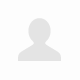
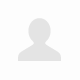

In [48]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

* 웹 페이지가 HTML 여러 개로 구성된 경우 다른 HTML로 이동하려면 iframe 태그를 사용
* switch_to_frame() 명령어를 실행하여 가상 웹 브라우저가 해당하는 iframe이 있는 HTML 정보를 가져올 수 있게 함.

In [45]:
page_url = "https://cafe.naver.com/remonterrace"

driver.get(page_url)

In [46]:
driver.switch_to.frame('cafe_main')
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<title>레몬테라스 [인테리어,리폼,DIY,요리,결혼,육아,커뮤니티] : 네이버 카페</title>
<link href="/favicon.ico?2" rel="shortcut icon" type="image/x-icon"/>
<meta content="always" name="referrer"/>
<link href="/static/css/main/css/line_sticker-1644284985000-9453.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/comment-1644284985000-17199.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/map/cafe_map-1644284985000-14563.css" rel="stylesheet" type="text/css"/>
<style id="myCafeIntroCss" type="text/css">
</style>
<link href="/static/css/main/css/wide/1080_cafe-1722404232000-230010.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/wide/1080_skin_green-1644284985000-22150.css" rel="stylesheet" type="text/css"/>
<script>
var g_sUserId = "";
var g

In [79]:
title_source = soup.select('td:nth-child(2) > div')
title_source

[<div class="board-list"><div class="inner_list"><a class="article" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33641877?menuid=116&amp;referrerAllArticles=false&amp;page=2">질타이트닝 레이저 부작용은 없을까요? 너무 민감한 부위라 걱정돼요</a><a class="cmt" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33641877?menuid=116&amp;referrerAllArticles=false&amp;page=2&amp;commentFocus=true"><span class="blind">댓글수</span>[4]</a></div></div>,
 <div class="board-list"><div class="inner_list"><a class="article" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33641818?menuid=116&amp;referrerAllArticles=false&amp;page=2">위고비 다욧중인데</a><a class="cmt" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33641818?menuid=116&amp;referrerAllArticles=false&amp;page=2&amp;commentFocus=true"><span class="blind">댓글수</span>[12]</a></div></div>,
 <div class="board-list"><div class="inner_list"><a class="article" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33640501?menuid=116&amp;referrerA

In [77]:
title_source[1].select('a.article')[0]

<a class="article" href="https://cafe.naver.com/f-e/cafes/10298136/articles/33641818?menuid=116&amp;referrerAllArticles=false&amp;page=2">위고비 다욧중인데</a>

In [78]:
title_source[1].select('a.article')[0].get_text().strip()

'위고비 다욧중인데'

In [95]:
import re
before = title_source[1].select('a.cmt')[0].get_text().strip()
comment_count = re.findall(r'\d+', before)
int(comment_count[0])


12

In [102]:
title_source = soup.select('td:nth-child(2) > div')
len(title_source)
dd=[]
titles = []
for rep in title_source:
            try:
                num = rep.select('a.cmt')[0].get_text().strip()
                num = re.findall(r'\d+', num)
                dd.append(int(num[0]))
            except:
                dd.append([0])
for title in title_source:
        t = title.select('a.article')[0].get_text().strip()

        titles.append(t)

datas = pd.DataFrame({"title":titles, "count":dd})

In [103]:
datas

,title,count
0,눈밑필러 효과나쁘지않게봤네요,5
1,다이어트약 간수치에 영향주나요?,4
2,물타먹는 다이어트포 추천해주세요,5
3,네일 필기 시험,6
4,잠도 오지 않고 또... 글 남기네요,4
5,다이어트 6일차,4
6,듀얼소닉 맥시멈 어떻게 사용하고계세요?,1
7,요즘 진짜 애보느라.. 피부관리 아예 안하게되네요 ㅠㅠ,21
8,누구나 할 수 있는 다이어트 방법,1
9,리프팅 못하겠어요ㅠㅠㅠ,9


In [124]:
def getTitle_numReplys(soup : BeautifulSoup):
    """포스팅 제목과 댓글 수를 수집한다"""

    titles = []
    num_replys = []

    title_source = soup.select('td:nth-child(2) > div')

    for title in title_source:
        t = title.select('a.article')[0].get_text().strip()

        titles.append(t)

    for rep in title_source:
        try:
            num = rep.select('a.cmt')[0].get_text().strip()
            num = re.findall(r'\d+', num)
            num_replys.append(int(num[0]))
        except:
            num_replys.append(0)

    return titles, num_replys

In [70]:
views = soup.select('td.td_normal.type_readCount')
views

[<td class="td_normal type_readCount">225</td>,
 <td class="td_normal type_readCount">1,045</td>,
 <td class="td_normal type_readCount">210</td>,
 <td class="td_normal type_readCount">260</td>,
 <td class="td_normal type_readCount">323</td>,
 <td class="td_normal type_readCount">107</td>,
 <td class="td_normal type_readCount">285</td>,
 <td class="td_normal type_readCount">411</td>,
 <td class="td_normal type_readCount">216</td>,
 <td class="td_normal type_readCount">344</td>,
 <td class="td_normal type_readCount">285</td>,
 <td class="td_normal type_readCount">147</td>,
 <td class="td_normal type_readCount">98</td>,
 <td class="td_normal type_readCount">57</td>,
 <td class="td_normal type_readCount">899</td>]

In [71]:
def getViews(soup : BeautifulSoup):
    """게시물 조회 수를 수집한다. 페이지당 15개"""
    views = [view.get_text() for view in soup.select('td.td_normal.type_readCount')]

    return views

In [72]:
def getDates(soup : BeautifulSoup):
    """게시물 작성일을 수집한다. 페이지당 15개"""

    dates = [d.get_text() for d in soup.select('td.td_normal.type_date')]

    return dates

In [82]:
titles, num_replys = getTitle_numReplys(soup)
views = getViews(soup)
dates = getDates(soup)

print("첫 번째 게시물 제목 :", titles[0])
print("댓글 수 :", num_replys[0])
print("조회 수 :", views[0])
print("작성일 :", dates[0])

첫 번째 게시물 제목 : 질타이트닝 레이저 부작용은 없을까요? 너무 민감한 부위라 걱정돼요
댓글 수 : 4
조회 수 : 225
작성일 : 2025.05.15.


In [94]:
len(num_replys)

225

In [83]:
Button1 = '//*[@id="cafe_content"]/div[5]/div[1]/button[1]'
Button2 = '//*[@id="cafe_content"]/div[5]/div[1]/button[2]'
Button3 = '//*[@id="cafe_content"]/div[5]/div[1]/button[3]'
Button4 = '//*[@id="cafe_content"]/div[5]/div[1]/button[4]'
Button5 = '//*[@id="cafe_content"]/div[5]/div[1]/button[5]'
Button6 = '//*[@id="cafe_content"]/div[5]/div[1]/button[6]'
Button7 = '//*[@id="cafe_content"]/div[5]/div[1]/button[7]'
Button8 = '//*[@id="cafe_content"]/div[5]/div[1]/button[8]'
Button9 = '//*[@id="cafe_content"]/div[5]/div[1]/button[9]'
Button10 = '//*[@id="cafe_content"]/div[5]/div[1]/button[10]'
ButtonNext = '//*[@id="cafe_content"]/div[5]/div[1]/button[11]' 

Button11 = '//*[@id="cafe_content"]/div[5]/div[1]/button[2]'
Button12 = '//*[@id="cafe_content"]/div[5]/div[1]/button[3]'
Button13 = '//*[@id="cafe_content"]/div[5]/div[1]/button[4]'
Button14 = '//*[@id="cafe_content"]/div[5]/div[1]/button[5]'
Button15 = '//*[@id="cafe_content"]/div[5]/div[1]/button[6]'
Button16 = '//*[@id="cafe_content"]/div[5]/div[1]/button[7]'
Button17 = '//*[@id="cafe_content"]/div[5]/div[1]/button[8]'
Button18 = '//*[@id="cafe_content"]/div[5]/div[1]/button[9]'
Button19 = '//*[@id="cafe_content"]/div[5]/div[1]/button[10]'
Button20 = '//*[@id="cafe_content"]/div[5]/div[1]/button[11]'
ButtonNext_1 = '//*[@id="cafe_content"]/div[5]/div[1]/button[12]'

In [84]:
Buttons_round1 = [Button2, Button3, Button4, Button5, Button7, Button8, Button9, Button10, ButtonNext]
Buttons_round2 = [Button11, Button12, Button13, Button14, Button15, Button16, Button17, Button18, Button19, Button20, ButtonNext_1]

In [125]:
driver = webdriver.Chrome()

page_url = "https://cafe.naver.com/f-e/cafes/10298136/menus/116?page=2"
driver.get(page_url)
time.sleep(3)

all_titles = []
all_num_replys = []
all_views = []
all_dates = []

for click in Buttons_round1:
    driver.find_element(By.XPATH, click).click()
    time.sleep(2)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    titles, num_replys = getTitle_numReplys(soup)
    views = getViews(soup)
    dates = getDates(soup)

    all_titles.append(titles)
    all_num_replys.append(num_replys)
    all_views.append(views)
    all_dates.append(dates)

cnt = 0
while(cnt<12):
    print(cnt)

    for click in Buttons_round2:
        driver.find_element(By.XPATH, click).click()
        time.sleep(2)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        titles, num_replys = getTitle_numReplys(soup)
        views = getViews(soup)
        dates = getDates(soup)

        all_titles.append(titles)
        all_num_replys.append(num_replys)
        all_views.append(views)
        all_dates.append(dates)

    cnt += 1

0
1
2
3
4
5
6
7
8
9
10
11


In [123]:
len(all_titles)


141

In [ ]:
import re

all_titles_ = sum(all_titles, [])

all_num_replys_ = sum(all_num_replys, [])
all_views_ = sum(all_views, [])
all_dates_ = sum(all_dates, [])

df = pd.DataFrame({"title":all_titles_, "replys": all_num_replys_, "views": all_views_, "dates": all_dates_})

df['replys'] = df["replys"].astype("str")

df['replys'] = df['replys'].apply(lambda x:re.findall("\d+", x)[0])
df.head()

,title,replys,views,dates


In [128]:
df.head()

,title,replys,views,dates
0,아*핀 깔창 사용해보신분~~,0,21,2025.05.15.
1,저주파 발마사지기 효과있을까요?,4,74,2025.05.15.
2,질타이트닝 레이저 부작용은 없을까요? 너무 민감한 부위라 걱정돼요,4,227,2025.05.15.
3,위고비 다욧중인데,12,"1,054",2025.05.15.
4,단기간 다이어트!최고효과?,2,213,2025.05.14.


In [129]:
filepath = './data'
df.to_excel(filepath+'/레몬테라스_포스팅_데이터.xlsx', index=False)

In [130]:
driver.close()

In [118]:
print(len(all_titles_))
print(len(all_num_replys_))
print(len(all_views_))
print(len(all_dates_))

2115
31725
2115
2115


In [91]:
all_num_replys_

[4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,
 24,
 4,
 12,
 2,
 22,
 7,
 10,
 5,
 15,
 2,
 12,
 11,
 5,
 4,
 7,


## 생생한 고객 의견을 들을 수 있는 쇼핑몰 리뷰 수집

In [1]:
!pip install tqdm


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
url = 'https://shopping.naver.com/window/beauty/search?q=%EB%A9%94%EC%9D%B4%ED%81%AC%EC%97%85%20%EC%BF%A0%EC%85%98'

In [19]:
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm import notebook

from bs4 import BeautifulSoup
import time

import re
import warnings

warnings.filterwarnings('ignore')

url = 'https://shopping.naver.com/window/beauty/search?q=%EB%A9%94%EC%9D%B4%ED%81%AC%EC%97%85%20%EC%BF%A0%EC%85%98'

In [29]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(3)

In [7]:
body = driver.find_element(By.CSS_SELECTOR, 'body')
for down in range(13):
    body.send_keys(Keys.PAGE_DOWN)

    time.sleep(0.8)

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

In [21]:
def page_down():
    """페이지 다운키 13번 입력"""
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    for down in range(16):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.8)

In [20]:

url_soup = soup.select("div > a")

cushion_urls = []
for a in url_soup:
    tmp = a.attrs['href']
    cushion_urls.append(tmp)

print("수집한 제품 URL 수", len(cushion_urls))
print("첫 번째 URL :\n", cushion_urls[0])

수집한 제품 URL 수 215
첫 번째 URL :
 https://shopping.naver.com/ns/home


In [21]:
product = []
for url in product_urls:
    if 'product' in url:
        product.append(url)

In [24]:
product

['https://shopping.naver.com/window-products/beauty/5471258317?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/6255868510?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/7195971830?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/5471270408?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/7048818422?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/6554154212?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/7464896036?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/11499313187?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/6973550301?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/10273473030?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/11810098729?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/6489534628?tr=swsc',
 'https://shopping.naver.com/window-products/beauty/10866059073?tr=swsc',
 'https://shopping.naver.com/window-products/be

In [25]:
df_url = pd.DataFrame({"url": product})
df_url.to_excel('쿠션_제품_URL.xlsx', index=False)
product_urls = df_url['url'].tolist()

In [31]:
product_urls[0]

'https://shopping.naver.com/window-products/beauty/5471258317?tr=swsc'

In [2]:
pwd()

'c:\\Users\\hisem\\Desktop\\DataAnalysisPython\\2장'

In [13]:
import pandas as pd
product_urls = pd.read_excel('data/쿠션_제품_URL.xlsx')

In [15]:
product_urls = product_urls['url'].tolist()

제품 이름 수집 \
리뷰 수 수집 \
포토 리뷰 수 수집 \
태그 수집 


In [22]:
driver = webdriver.Chrome()
driver.get(product_urls[0])

page_down()
time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
def getHashTags(soup):
    """해시태크를 반환"""
    try:
        elements = []
        for i in range(1, 21):
            Xpath = 

In [33]:
hash_soup = soup.select(" button")

In [49]:
def getHashTags(soup):
    try:
        elements = []
        for i in range(1,21):
            Xpath = f'//*[@id="REVIEW"]/div/div/div[3]/div[1]/div[2]/div[2]/div[1]/ul/li[{i}]/button'
            found_elements = driver.find_elements(By.XPATH, Xpath)
            if found_elements:
                elements.extend(found_elements)
        tags = [elements[i].text for i in range(len(elements))]
        return tags
    except:
        return "없음" 


In [53]:
def getProductName(soup:BeautifulSoup):
    name = soup.select_one('div._1eddO7u4UC > h3').text
    return name
def getNumLikes(soup:BeautifulSoup):
    """찜한 수를 반환"""
    try:
        likes = soup.select_one('div._3Dy-2NaoiG > a > em').text
        return likes
    except:
        return "없음" 

def getNumReviews(soup:BeautifulSoup):
    """리뷰 수를 반환"""
    try:
        num_review = soup.select_one('div._1txuie7UTH > strong > span').text
        return num_review
    except:
        return "없음"
    
def getNumPhotoReviews(soup:BeautifulSoup):
    """포토 리뷰 수를 반환"""
    try:
        photo_review = soup.select_one('div._1fsh_AYvpf._34B2ojkxX6 > div > strong > span').text
        return photo_review
    except:
        return "없음" 
    
name = getProductName(soup)
likes = getNumLikes(soup)
num_review = getNumReviews(soup)
photo_review = getNumPhotoReviews(soup)
tags = getHashTags(soup)
product_data = {"name":[name],
                "tag":[tags],
                "likes":[likes],
                "num_review":[num_review],
                "num_photo":[photo_review],
                "url":[url]}
product_info_df = pd.DataFrame(data=product_data)
save_name = re.compile("[^가-힣]+").sub("",name)
product_info_df.to_excel('./data/{}_info_test.xlsx'.format(save_name), index=False)
product_info_df

,name,tag,likes,num_review,num_photo,url
0,헤라 블랙 쿠션 파운데이션 듀오 SPF34/PA++ 15gx2 (본품1개+리필1개)...,"[커버가 잘 돼요, 지속력이 좋아요, 항상 사용해요, 만족스러워요, 밀착이 잘 돼요...","3,871","112,250","71,740",http://www.navercorp.com


In [51]:
product_data['tag'] = [tags]

In [52]:
product_info_df = pd.DataFrame(data=product_data)
save_name = re.compile("[^가-힣]+").sub("",name)
product_info_df.to_excel('./data/{}_info_test.xlsx'.format(save_name), index=False)
product_info_df

,name,likes,num_review,num_photo,url,tag
0,헤라 블랙 쿠션 파운데이션 듀오 SPF34/PA++ 15gx2 (본품1개+리필1개)...,"3,871","112,250","71,740",http://www.navercorp.com,"[커버가 잘 돼요, 지속력이 좋아요, 항상 사용해요, 만족스러워요, 밀착이 잘 돼요..."


In [ ]:
def collectDateReviewScore(soup):
    """전달받은 soup에서 페이지별 날자, 리뷰, 점수를 반환한다"""

    # 리뷰 평점 20개
    elements_ratings = []
    
    for num in range(1, 25):
        xpath_rating = 